# Loading necessary libraries

In [1]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import time
import datetime

In [2]:
!pip install tweepy

ERROR: Could not find a version that satisfies the requirement tweepy (from versions: none)
ERROR: No matching distribution found for tweepy


In [3]:
!pip install tweepy

ERROR: Could not find a version that satisfies the requirement tweepy (from versions: none)
ERROR: No matching distribution found for tweepy


In [4]:
!pip3 install tweepy

ERROR: Could not find a version that satisfies the requirement tweepy (from versions: none)
ERROR: No matching distribution found for tweepy


In [5]:
!pip uninstall tweepy

In [6]:
conda install -c conda-forge tweepy


Note: you may need to restart the kernel to use updated packages.



CondaHTTPError: HTTP 000 CONNECTION FAILED for url <https://conda.anaconda.org/conda-forge/win-64/current_repodata.json>
Elapsed: -

An HTTP error occurred when trying to retrieve this URL.
HTTP errors are often intermittent, and a simple retry will get you on your way.
'https://conda.anaconda.org/conda-forge/win-64'




# Read in the csv data 

In [7]:
enhanced_data = pd.read_csv('twitter-archive-enhanced.csv')
enhanced_data.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2240,667924896115245057,NaN,NaN,2015-11-21 04:37:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jiminy. He has always wanted to be a c...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667924896...,9,10,Jiminy,None,None,None,None
237,847157206088847362,NaN,NaN,2017-03-29 18:43:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Daisy. She's been pup for adoption for mo...,NaN,NaN,NaN,"https://www.petfinder.com/petdetail/37334596,h...",11,10,Daisy,None,None,None,None
934,753420520834629632,NaN,NaN,2016-07-14 02:47:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we are witnessing an isolated squad of bo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/753420520...,11,10,None,None,None,None,None
2235,668171859951755264,NaN,NaN,2015-11-21 20:59:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Trans Siberian Kellogg named Alfonso...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668171859...,7,10,a,None,None,None,None
427,821153421864615936,8.211526e+17,113211856.0,2017-01-17 00:33:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@imgur for a polar bear tho I'd say 13/10 is a...,NaN,NaN,NaN,NaN,13,10,None,None,None,None,None
1358,703382836347330562,NaN,NaN,2016-02-27 00:55:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Charlie. He's a West Side Niddlewog. M...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/703382836...,12,10,Charlie,None,None,None,None
1963,673352124999274496,NaN,NaN,2015-12-06 04:03:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",*lets out a tiny screech and then goes into co...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673352124...,12,10,None,None,None,None,None
34,885528943205470208,NaN,NaN,2017-07-13 15:58:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Maisey. She fell asleep mid-excavation...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/885528943...,13,10,Maisey,None,None,None,None
949,752309394570878976,NaN,NaN,2016-07-11 01:11:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Everyone needs to watch this. 1...,6.753544e+17,4.196984e+09,2015-12-11 16:40:19 +0000,https://twitter.com/dog_rates/status/675354435...,13,10,None,None,None,None,None
316,834931633769889797,NaN,NaN,2017-02-24 01:03:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tucker. He decided it was time to part...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/834931633...,12,10,Tucker,None,None,None,None


In [8]:
enhanced_data_copy = enhanced_data.copy()

In [9]:
enhanced_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [10]:
enhanced_data_copy['tweet_id'].duplicated().sum()

0

In [11]:
enhanced_data_copy['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [12]:
enhanced_data.duplicated().sum()

0

In [13]:
#create a copy of my enhanced_data

enhanced_data_copy = enhanced_data.copy()

In [14]:
#Checking and reviewing enhanced_data columns with numbers to check for outliers
enhanced_data_copy.describe()


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


From the above, we can clearly see that there are outliers and we need to deal with that

In [15]:
enhanced_data_copy['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [16]:
enhanced_data_copy['rating_denominator'].value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

# Read in the image prediction data

In [19]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)


In [20]:
with open('image-predictions.tsv', mode = 'wb') as image_file:
    image_file.write(response.content)

In [21]:
image_prediction = pd.read_csv('image-predictions.tsv', sep = '\t')
image_prediction.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1214,743253157753532416,https://pbs.twimg.com/media/ClCQzFUUYAA5vAu.jpg,1,malamute,0.442612,True,Siberian_husky,0.368137,True,Eskimo_dog,0.177822,True
440,674447403907457024,https://pbs.twimg.com/media/CVweVUfW4AACPwI.jpg,1,Brabancon_griffon,0.409909,True,malinois,0.244649,True,bull_mastiff,0.074819,True
369,672970152493887488,https://pbs.twimg.com/media/CVbeyGUU8AEq300.jpg,1,leaf_beetle,0.340154,False,rhinoceros_beetle,0.139698,False,crayfish,0.058034,False
393,673583129559498752,https://pbs.twimg.com/media/CVkMRUeWsAA9bMh.jpg,1,Arctic_fox,0.153271,False,golden_retriever,0.113946,True,borzoi,0.110718,True
2037,884562892145688576,https://pbs.twimg.com/media/DEaZQkfXUAEC7qB.jpg,1,pug,0.546406,True,French_bulldog,0.404291,True,Brabancon_griffon,0.044002,True
971,706593038911545345,https://pbs.twimg.com/media/Cc5Snc7XIAAMidF.jpg,1,four-poster,0.696423,False,quilt,0.189312,False,pillow,0.029409,False
923,702276748847800320,https://pbs.twimg.com/media/Cb78-nOWIAENNRc.jpg,1,Boston_bull,0.697303,True,French_bulldog,0.239015,True,American_Staffordshire_terrier,0.019838,True
301,671497587707535361,https://pbs.twimg.com/media/CVGjflNWoAEwgrQ.jpg,1,swing,0.089165,False,paddle,0.080747,False,bathing_cap,0.065694,False
1294,751830394383790080,https://pbs.twimg.com/media/Cm8JwBqW8AAFOEn.jpg,1,chow,0.703569,True,Pomeranian,0.076637,True,Siamese_cat,0.045959,False
278,670995969505435648,https://pbs.twimg.com/media/CU_bRIEWcAAUVC7.jpg,1,redbone,0.866221,True,beagle,0.061194,True,Rhodesian_ridgeback,0.024285,True


In [22]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [23]:
image_prediction['jpg_url'].duplicated().sum()

66

# Read in the Twitter Data using the json.txt file, Tweepy package did not work

In [1]:
#import tweepy

#consumer_key = 'YOUR CONSUMER KEY'
#consumer_secret = 'YOUR CONSUMER SECRET'
#access_token = 'YOUR ACCESS TOKEN'
#access_secret = 'YOUR ACCESS SECRET'

#auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth)

In [24]:
# Converting json txt file to python object to enable each line to be read as a piece of tweet information
df_list = []

with open('tweet-json copy', 'r') as file:
    for line in file:
        df_list.append(json.loads(line) )



# Creating dataframe from the df_list
tweet_data = pd.DataFrame(df_list, columns=['id','retweet_count','favorite_count'])
tweet_data.head(60)

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


In [25]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


### Checking out the columns in all 3 dataframes

In [26]:
enhanced_data.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [27]:
image_prediction.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [28]:
tweet_data.columns

Index(['id', 'retweet_count', 'favorite_count'], dtype='object')

In [139]:
tweet_data.rename(columns ={'id':'tweet_id'}, inplace = True)

# Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



# Quality issues
1. The in_reply_to_status_id,in_reply_to_user_id ,  source,retweeted_status_user_id      ,retweeted_status_timestamp columns have NaN, hence would not be needed for the purpose of this analysis

2. The rows without extended_url columns is not needed for the sake of the analysis 

3. There are some values in the rating_numerator that are to considered as outliers

4. There are some values in the rating_denominator that are to considered as outliers

5. The analysis needs only tweets and not retweets, so we texts with 'RT @' can be dropped

6. There are names on the names column that are  in lower case - we need to get this repalace them wth None

7. The data type for retweeted status time is not in the appropriate time data type

8. some of the dog type columns have more than one dog type


# Tidiness issues
1. The name of the Dog is on separate columns and it should not be
2. The tweet_data table should be part of the enhanced_archive table and at the end combine all three dataframes

## LET'S GET TO WORK - DATA CLEANING

In [30]:
#Making copies of the original data

enhanced_data_copy1 = enhanced_data.copy()
enhanced_data_copy2 = enhanced_data.copy()

### Define: Issue #1

We would drop all the columns with the NaN values, removing the NaN rows would reduce the data and would be be reliable to draw insights from.

### Code: Isuue #1

In [31]:
enhanced_data_copy1.sample(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1197,717009362452090881,NaN,NaN,2016-04-04 15:22:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Smokey. He's having some sort of exist...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/717009362...,10,10,Smokey,None,None,pupper,None
883,760252756032651264,NaN,NaN,2016-08-01 23:15:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Fido. He can tell the weather. Not goo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/760252756...,4,10,Fido,None,None,None,None


In [32]:
enhanced_data_copy1=enhanced_data_copy1.drop(columns=['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_user_id','retweeted_status_timestamp'])

### Test: Issue #1

In [33]:
enhanced_data_copy1.head(2)

,tweet_id,timestamp,source,text,retweeted_status_id,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [34]:
enhanced_data_copy1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   tweet_id             2356 non-null   int64  
 1   timestamp            2356 non-null   object 
 2   source               2356 non-null   object 
 3   text                 2356 non-null   object 
 4   retweeted_status_id  181 non-null    float64
 5   expanded_urls        2297 non-null   object 
 6   rating_numerator     2356 non-null   int64  
 7   rating_denominator   2356 non-null   int64  
 8   name                 2356 non-null   object 
 9   doggo                2356 non-null   object 
 10  floofer              2356 non-null   object 
 11  pupper               2356 non-null   object 
 12  puppo                2356 non-null   object 
dtypes: float64(1), int64(3), object(9)
memory usage: 239.4+ KB


### Define: Issue 2

We have to drop all the row in the extended url columns with null values

### Code: Issue 2

In [35]:
new_data = enhanced_data_copy1.dropna(subset = ['expanded_urls'], inplace = True)

### Test: Issue 2

In [36]:
enhanced_data_copy1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   tweet_id             2297 non-null   int64  
 1   timestamp            2297 non-null   object 
 2   source               2297 non-null   object 
 3   text                 2297 non-null   object 
 4   retweeted_status_id  180 non-null    float64
 5   expanded_urls        2297 non-null   object 
 6   rating_numerator     2297 non-null   int64  
 7   rating_denominator   2297 non-null   int64  
 8   name                 2297 non-null   object 
 9   doggo                2297 non-null   object 
 10  floofer              2297 non-null   object 
 11  pupper               2297 non-null   object 
 12  puppo                2297 non-null   object 
dtypes: float64(1), int64(3), object(9)
memory usage: 251.2+ KB


### Define: Issue 3

There are some values in the rating_numerator that are to considered as outliers and we need to drop them

### Code: Issue 3

In [37]:
enhanced_data_copy1['rating_numerator'].value_counts()

12      547
11      455
10      455
13      339
9       156
8       102
7        53
14       50
5        35
6        32
3        19
4        16
2         9
1         6
0         2
75        2
84        1
45        1
88        1
144       1
26        1
121       1
143       1
44        1
60        1
99        1
80        1
50        1
204       1
1776      1
165       1
15        1
27        1
24        1
420       1
Name: rating_numerator, dtype: int64

In [38]:
#The data that would be retained would be data between 1 and 15, every other rating is not valid

query_test1 = enhanced_data_copy1.copy()


In [39]:
query_test1 = ((query_test1['rating_numerator'] > 0) & (query_test1['rating_numerator'] < 16))

In [40]:
enhanced_data_copy1 = enhanced_data_copy1.loc[query_test1]

In [41]:
enhanced_data_copy1.describe()

,tweet_id,retweeted_status_id,rating_numerator,rating_denominator
count,2.275000e+03,1.790000e+02,2275.000000,2275.000000
mean,7.421995e+17,7.714871e+17,10.700659,10.002198
std,6.836946e+16,6.238752e+16,2.138473,0.270987
min,6.660209e+17,6.661041e+17,1.000000,2.000000
25%,6.782670e+17,7.157203e+17,10.000000,10.000000
50%,7.189719e+17,7.798343e+17,11.000000,10.000000
75%,7.986778e+17,8.201334e+17,12.000000,10.000000
max,8.924206e+17,8.874740e+17,15.000000,20.000000


### Define: Issue 4

There are some values in the rating_denominator that are to considered as outliers

### Code: Issue 4

In [42]:
#Check the data so far

enhanced_data_copy1.sample(10)

,tweet_id,timestamp,source,text,retweeted_status_id,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
806,772102971039580160,2016-09-03 16:04:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Penny. She's an OU cheerleader. About ...,NaN,https://twitter.com/dog_rates/status/772102971...,11,10,Penny,None,None,None,None
368,828708714936930305,2017-02-06 20:55:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Fiona. She's an exotic dog. Seems rath...,NaN,https://twitter.com/dog_rates/status/828708714...,10,10,Fiona,None,None,None,None
1062,741099773336379392,2016-06-10 02:48:49 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Ted. He's given up. 11/10 relatable af...,NaN,https://vine.co/v/ixHYvdxUx1L,11,10,Ted,None,None,None,None
996,748337862848962560,2016-06-30 02:10:24 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",SWIM AWAY PUPPER SWIM AWAY 13/10 #BarkWeek ht...,NaN,https://vine.co/v/h5aDaFthX6O,13,10,None,None,None,pupper,None
2040,671544874165002241,2015-12-01 04:22:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Interesting dog here. Very large. Purple. Mani...,NaN,https://twitter.com/dog_rates/status/671544874...,6,10,None,None,None,None,None
1687,681579835668455424,2015-12-28 20:57:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Apollo. He thought you weren't coming ...,NaN,https://twitter.com/dog_rates/status/681579835...,8,10,Apollo,None,None,None,None
1415,698703483621523456,2016-02-14 03:01:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rusty. He has no respect for POULTRY p...,NaN,https://twitter.com/dog_rates/status/698703483...,7,10,Rusty,None,None,None,None
1971,673270968295534593,2015-12-05 22:41:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mac. His dad's probably a lawyer. 11/1...,NaN,https://twitter.com/dog_rates/status/673270968...,11,10,Mac,None,None,None,None
249,845306882940190720,2017-03-24 16:10:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pickles. She's a silly pupper. Thinks ...,NaN,https://twitter.com/dog_rates/status/845306882...,12,10,Pickles,None,None,pupper,None
1277,709042156699303936,2016-03-13 15:43:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Klevin. He's addicted to sandwiches (y...,NaN,https://twitter.com/dog_rates/status/709042156...,9,10,Klevin,None,None,None,None


In [43]:
enhanced_data_copy1.describe()

,tweet_id,retweeted_status_id,rating_numerator,rating_denominator
count,2.275000e+03,1.790000e+02,2275.000000,2275.000000
mean,7.421995e+17,7.714871e+17,10.700659,10.002198
std,6.836946e+16,6.238752e+16,2.138473,0.270987
min,6.660209e+17,6.661041e+17,1.000000,2.000000
25%,6.782670e+17,7.157203e+17,10.000000,10.000000
50%,7.189719e+17,7.798343e+17,11.000000,10.000000
75%,7.986778e+17,8.201334e+17,12.000000,10.000000
max,8.924206e+17,8.874740e+17,15.000000,20.000000


In [44]:
enhanced_data_copy1['rating_denominator'].value_counts()

10    2270
11       3
20       1
2        1
Name: rating_denominator, dtype: int64

In [45]:
enhanced_data_copy1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2275 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   tweet_id             2275 non-null   int64  
 1   timestamp            2275 non-null   object 
 2   source               2275 non-null   object 
 3   text                 2275 non-null   object 
 4   retweeted_status_id  179 non-null    float64
 5   expanded_urls        2275 non-null   object 
 6   rating_numerator     2275 non-null   int64  
 7   rating_denominator   2275 non-null   int64  
 8   name                 2275 non-null   object 
 9   doggo                2275 non-null   object 
 10  floofer              2275 non-null   object 
 11  pupper               2275 non-null   object 
 12  puppo                2275 non-null   object 
dtypes: float64(1), int64(3), object(9)
memory usage: 248.8+ KB


In [46]:
denominator = enhanced_data_copy1.copy()

In [47]:
denominator = (denominator['rating_denominator'] < 11)

In [48]:
enhanced_data_copy_1 = enhanced_data_copy1.loc[denominator]

### Test: Issue #4

In [49]:
enhanced_data_copy_1.describe()

,tweet_id,retweeted_status_id,rating_numerator,rating_denominator
count,2.271000e+03,1.780000e+02,2271.000000,2271.000000
mean,7.422204e+17,7.716619e+17,10.706737,9.996477
std,6.841369e+16,6.251954e+16,2.133712,0.167873
min,6.660209e+17,6.661041e+17,1.000000,2.000000
25%,6.781383e+17,7.142646e+17,10.000000,10.000000
50%,7.189392e+17,7.801500e+17,11.000000,10.000000
75%,7.986846e+17,8.202240e+17,12.000000,10.000000
max,8.924206e+17,8.874740e+17,15.000000,10.000000


In [50]:
enhanced_data_copy_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2271 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   tweet_id             2271 non-null   int64  
 1   timestamp            2271 non-null   object 
 2   source               2271 non-null   object 
 3   text                 2271 non-null   object 
 4   retweeted_status_id  178 non-null    float64
 5   expanded_urls        2271 non-null   object 
 6   rating_numerator     2271 non-null   int64  
 7   rating_denominator   2271 non-null   int64  
 8   name                 2271 non-null   object 
 9   doggo                2271 non-null   object 
 10  floofer              2271 non-null   object 
 11  pupper               2271 non-null   object 
 12  puppo                2271 non-null   object 
dtypes: float64(1), int64(3), object(9)
memory usage: 248.4+ KB


### Define: Issue 5

The analysis needs only tweets and not retweets, so we texts with 'RT @' can be dropped

### Code: Issue 5

In [51]:
enhanced_data_copy_1.sample(20)

,tweet_id,timestamp,source,text,retweeted_status_id,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1012,747242308580548608,2016-06-27 01:37:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This pupper killed this great w...,7.047611e+17,https://twitter.com/dog_rates/status/704761120...,13,10,None,None,None,pupper,None
1787,677565715327688705,2015-12-17 19:07:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Contortionist pup here. Inside pentagram. Clea...,NaN,https://twitter.com/dog_rates/status/677565715...,6,10,None,None,None,None,None
168,859607811541651456,2017-05-03 03:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Sorry for the lack of posts today. I came home...,NaN,https://twitter.com/dog_rates/status/859607811...,13,10,None,None,None,None,puppo
1984,672902681409806336,2015-12-04 22:17:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jimison. He's stuck in a pot. Damn it ...,NaN,https://twitter.com/dog_rates/status/672902681...,9,10,Jimison,None,None,None,None
144,863907417377173506,2017-05-15 00:02:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Albus. He's quite impressive at hide a...,NaN,https://twitter.com/dog_rates/status/863907417...,13,10,Albus,None,None,None,None
1682,681891461017812993,2015-12-29 17:36:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Charlie. He's scholarly af. Quite...,NaN,https://twitter.com/dog_rates/status/681891461...,10,10,Charlie,None,None,pupper,None
312,835264098648616962,2017-02-24 23:04:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Lola. Her hobbies include being precious ...,NaN,https://www.gofundme.com/lolas-life-saving-sur...,12,10,Lola,None,None,None,None
1347,704364645503647744,2016-02-29 17:56:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Bisquick. He's a Beneplop Cumbers...,NaN,https://twitter.com/dog_rates/status/704364645...,12,10,Bisquick,None,None,None,None
384,826958653328592898,2017-02-02 01:01:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Loki. He smiles like Elvis. Ain't noth...,NaN,https://twitter.com/dog_rates/status/826958653...,12,10,Loki,doggo,None,None,None
2024,671891728106971137,2015-12-02 03:20:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mojo. Apparently he's too cute for a s...,NaN,https://twitter.com/dog_rates/status/671891728...,11,10,Mojo,None,None,None,None


In [52]:
enhanced_data_copy_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2271 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   tweet_id             2271 non-null   int64  
 1   timestamp            2271 non-null   object 
 2   source               2271 non-null   object 
 3   text                 2271 non-null   object 
 4   retweeted_status_id  178 non-null    float64
 5   expanded_urls        2271 non-null   object 
 6   rating_numerator     2271 non-null   int64  
 7   rating_denominator   2271 non-null   int64  
 8   name                 2271 non-null   object 
 9   doggo                2271 non-null   object 
 10  floofer              2271 non-null   object 
 11  pupper               2271 non-null   object 
 12  puppo                2271 non-null   object 
dtypes: float64(1), int64(3), object(9)
memory usage: 248.4+ KB


In [53]:
enhanced_data_copy_1 = enhanced_data_copy_1[enhanced_data_copy_1['retweeted_status_id'].isna()]

In [54]:
#After removing the RT, we can now drop the retweeted status id column

enhanced_data_copy_1.drop(columns = ['retweeted_status_id'], inplace = True)

### Test: Issue 5

In [55]:
enhanced_data_copy_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2093 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2093 non-null   int64 
 1   timestamp           2093 non-null   object
 2   source              2093 non-null   object
 3   text                2093 non-null   object
 4   expanded_urls       2093 non-null   object
 5   rating_numerator    2093 non-null   int64 
 6   rating_denominator  2093 non-null   int64 
 7   name                2093 non-null   object
 8   doggo               2093 non-null   object
 9   floofer             2093 non-null   object
 10  pupper              2093 non-null   object
 11  puppo               2093 non-null   object
dtypes: int64(3), object(9)
memory usage: 212.6+ KB


### Define: Issue 6

There are names on the names column that are  in lower case - we need to get this repalace them wth None

### Code: Issue 6

In [56]:
enhanced_data_copy_1['name'].value_counts()

None          606
a              54
Charlie        11
Lucy           11
Oliver         10
             ... 
Wishes          1
Rose            1
Theo            1
Fido            1
Christoper      1
Name: name, Length: 952, dtype: int64

In [57]:
enhanced_data_copy_1['name'][enhanced_data_copy_1['name'].str.match('[a-z]+')] = 'None'

C:\Users\fifok\AppData\Local\Temp/ipykernel_13868/866337398.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enhanced_data_copy_1['name'][enhanced_data_copy_1['name'].str.match('[a-z]+')] = 'None'


In [58]:
enhanced_data_copy_1.name[enhanced_data_copy_1.name == 'None'].value_counts()

None    708
Name: name, dtype: int64

### Test: Issue 6



In [59]:
enhanced_data_copy_1['name'].value_counts().sort_index(ascending=True)

Abby     2
Ace      1
Acro     1
Adele    1
Aiden    1
        ..
Ziva     1
Zoe      1
Zoey     3
Zooey    1
Zuzu     1
Name: name, Length: 928, dtype: int64

### Define: Issue 7

The data type for retweeted status time is not in the appropriate time data type - Convert the timestamp column to Dateatime

### Code: Issue 7

In [60]:
enhanced_data_copy_1['timestamp'] = pd.to_datetime(enhanced_data_copy_1['timestamp'])

In [61]:
#Extract month from the timestamp columns for the purpose of the analysis
enhanced_data_copy_1['month'] = enhanced_data_copy_1['timestamp'].dt.to_period('M')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1143: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


In [62]:
enhanced_data_copy_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2093 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2093 non-null   int64              
 1   timestamp           2093 non-null   datetime64[ns, UTC]
 2   source              2093 non-null   object             
 3   text                2093 non-null   object             
 4   expanded_urls       2093 non-null   object             
 5   rating_numerator    2093 non-null   int64              
 6   rating_denominator  2093 non-null   int64              
 7   name                2093 non-null   object             
 8   doggo               2093 non-null   object             
 9   floofer             2093 non-null   object             
 10  pupper              2093 non-null   object             
 11  puppo               2093 non-null   object             
 12  month               2093 non-null 

In [63]:
enhanced_data_copy_1['Day'] = enhanced_data_copy_1['timestamp'].dt.to_period('D')

In [64]:
enhanced_data_copy_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2093 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2093 non-null   int64              
 1   timestamp           2093 non-null   datetime64[ns, UTC]
 2   source              2093 non-null   object             
 3   text                2093 non-null   object             
 4   expanded_urls       2093 non-null   object             
 5   rating_numerator    2093 non-null   int64              
 6   rating_denominator  2093 non-null   int64              
 7   name                2093 non-null   object             
 8   doggo               2093 non-null   object             
 9   floofer             2093 non-null   object             
 10  pupper              2093 non-null   object             
 11  puppo               2093 non-null   object             
 12  month               2093 non-null 

In [120]:
enhanced_data_copy_1.sample(50)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,month,day
2252,667801013445750784,2015-11-20 20:25:43+00:00,"<a href=""http://twitter.com/download/iphone"" r...",OMIGOD 12/10 https://t.co/SVMF4Frf1w,https://twitter.com/dog_rates/status/667801013...,12,10,None,None,None,None,None,November,Friday
690,787397959788929025,2016-10-15 21:01:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Moose. He's rather h*ckin dangerous (y...,https://twitter.com/dog_rates/status/787397959...,11,10,Moose,None,None,None,None,October,Saturday
413,822872901745569793,2017-01-21 18:26:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...,13,10,None,None,None,None,puppo,January,Saturday
1848,675798442703122432,2015-12-12 22:04:39+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bernie. He just touched a boob for the...,https://twitter.com/dog_rates/status/675798442...,10,10,Bernie,None,None,None,None,December,Saturday
1126,729854734790754305,2016-05-10 02:05:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Ollie. He conducts this train. He...,https://twitter.com/dog_rates/status/729854734...,11,10,Ollie,None,None,None,None,May,Tuesday
839,767191397493538821,2016-08-21 02:47:37+00:00,"<a href=""http://twitter.com/download/iphone"" r...",I don't know any of the backstory behind this ...,https://twitter.com/dog_rates/status/767191397...,13,10,None,doggo,None,None,None,August,Sunday
181,857029823797047296,2017-04-26 00:33:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Zeke. He performs group cheeky wink tu...,https://twitter.com/dog_rates/status/857029823...,12,10,Zeke,None,None,None,None,April,Wednesday
2100,670704688707301377,2015-11-28 20:43:53+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Danny. He's too good to look at the road ...,https://twitter.com/dog_rates/status/670704688...,6,10,Danny,None,None,None,None,November,Saturday
827,769212283578875904,2016-08-26 16:37:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is DonDon. He's way up but doesn't feel b...,https://twitter.com/dog_rates/status/769212283...,12,10,DonDon,None,None,None,None,August,Friday
2039,671547767500775424,2015-12-01 04:33:59+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Marley. She chews shoes then feels ext...,https://twitter.com/dog_rates/status/671547767...,10,10,Marley,None,None,None,None,December,Tuesday


In [66]:
enhanced_data_copy_1['day'] = enhanced_data_copy_1['timestamp'].dt.day_name()

In [67]:
enhanced_data_copy_1

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,month,Day,day
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,2017-08,2017-08-01,Tuesday
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,2017-08,2017-08-01,Tuesday
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,2017-07,2017-07-31,Monday
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,2017-07,2017-07-30,Sunday
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,2017-07,2017-07-29,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None,2015-11,2015-11-16,Monday
2352,666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,None,None,None,None,None,2015-11,2015-11-16,Monday
2353,666033412701032449,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,None,None,None,None,None,2015-11,2015-11-15,Sunday
2354,666029285002620928,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,None,None,None,None,None,2015-11,2015-11-15,Sunday


In [68]:
#Drop the 'Day' column

In [69]:
enhanced_data_copy_1['month'] = enhanced_data_copy_1['timestamp'].dt.month_name()

In [70]:
enhanced_data_copy_1.drop(columns=['Day'],inplace = True)

### Test: Issue 7

In [71]:
enhanced_data_copy_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2093 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2093 non-null   int64              
 1   timestamp           2093 non-null   datetime64[ns, UTC]
 2   source              2093 non-null   object             
 3   text                2093 non-null   object             
 4   expanded_urls       2093 non-null   object             
 5   rating_numerator    2093 non-null   int64              
 6   rating_denominator  2093 non-null   int64              
 7   name                2093 non-null   object             
 8   doggo               2093 non-null   object             
 9   floofer             2093 non-null   object             
 10  pupper              2093 non-null   object             
 11  puppo               2093 non-null   object             
 12  month               2093 non-null 

In [72]:
enhanced_data_copy_1

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,month,day
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,August,Tuesday
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,August,Tuesday
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,July,Monday
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,July,Sunday
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,July,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None,November,Monday
2352,666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,None,None,None,None,None,November,Monday
2353,666033412701032449,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,None,None,None,None,None,November,Sunday
2354,666029285002620928,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,None,None,None,None,None,November,Sunday


### Define: Issue 8

some of the dog type columns have more than one dog type

In [73]:
print(len(enhanced_data_copy_1[(enhanced_data_copy_1.doggo != 'None') & (enhanced_data_copy_1.floofer != 'None')]))
print(len(enhanced_data_copy_1[(enhanced_data_copy_1.doggo != 'None') & (enhanced_data_copy_1.puppo != 'None')]))
print(len(enhanced_data_copy_1[(enhanced_data_copy_1.doggo != 'None') & (enhanced_data_copy_1.pupper != 'None')]))

1
1
10


There are 10 records with both doggo and pupper and 1 record for doggo and puppo and also doggo and floofer, From what i read online, pupper and doggo can be used instead of each other, so we just have to set a column to either of the two, we would leave pupper and change doggo to None

### Code: Issue 8

In [74]:
for i, row in enhanced_data_copy_1[((enhanced_data_copy_1.doggo != 'None') & (enhanced_data_copy_1.floofer != 'None'))
                   | ((enhanced_data_copy_1.doggo != 'None') & (enhanced_data_copy_1.puppo != 'None'))].iterrows():
    print('%s | %s | \n'%(row.tweet_id, row.text))

855851453814013952 | Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel | 

854010172552949760 | At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk | 



This is showing that for both tweets, the dog type reffered to is clearly not doggo , so we have to change the doggo column for the tweet ID to None

In [75]:
enhanced_data_copy_1['doggo'][enhanced_data_copy_1.tweet_id.isin([855851453814013952, 854010172552949760])] = 'None'

C:\Users\fifok\AppData\Local\Temp/ipykernel_13868/1275295909.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enhanced_data_copy_1['doggo'][enhanced_data_copy_1.tweet_id.isin([855851453814013952, 854010172552949760])] = 'None'


In [76]:
enhanced_data_copy_1['doggo'][(enhanced_data_copy_1.doggo != 'None') & (enhanced_data_copy_1.pupper != 'None')] = 'None'

C:\Users\fifok\AppData\Local\Temp/ipykernel_13868/950489361.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enhanced_data_copy_1['doggo'][(enhanced_data_copy_1.doggo != 'None') & (enhanced_data_copy_1.pupper != 'None')] = 'None'


In [118]:
enhanced_data_copy_1

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,month,day
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,August,Tuesday
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,August,Tuesday
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,July,Monday
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,July,Sunday
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,July,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None,November,Monday
2352,666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,None,None,None,None,None,November,Monday
2353,666033412701032449,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,None,None,None,None,None,November,Sunday
2354,666029285002620928,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,None,None,None,None,None,November,Sunday


### Test: Issue 8

In [77]:
print(len(enhanced_data_copy_1[(enhanced_data_copy_1.doggo != 'None') & (enhanced_data_copy_1.floofer != 'None')]))
print(len(enhanced_data_copy_1[(enhanced_data_copy_1.doggo != 'None') & (enhanced_data_copy_1.puppo != 'None')]))
print(len(enhanced_data_copy_1[(enhanced_data_copy_1.doggo != 'None') & (enhanced_data_copy_1.pupper != 'None')]))

0
0
0


# Tidiness

### Define: Issue 9

The name of the Dog is on separate columns and it should not be

### Code: Issue 9

In [78]:
enhanced_data_copy_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2093 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2093 non-null   int64              
 1   timestamp           2093 non-null   datetime64[ns, UTC]
 2   source              2093 non-null   object             
 3   text                2093 non-null   object             
 4   expanded_urls       2093 non-null   object             
 5   rating_numerator    2093 non-null   int64              
 6   rating_denominator  2093 non-null   int64              
 7   name                2093 non-null   object             
 8   doggo               2093 non-null   object             
 9   floofer             2093 non-null   object             
 10  pupper              2093 non-null   object             
 11  puppo               2093 non-null   object             
 12  month               2093 non-null 

In [112]:
enhanced_data_copy_1.reset_index().head(1)

,index,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,month,day
0,0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,August,Tuesday


Using the melt function for convert the dog type columns(doggo, pupper, floofer and puppo) into one row

In [113]:
another_test = enhanced_data_copy_1.copy()

In [114]:
another_test.replace('None','', inplace=True)

In [115]:
another_test

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,month,day
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,,,,August,Tuesday
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,,,,August,Tuesday
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,,,,July,Monday
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,,,,July,Sunday
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,,,,July,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,,,,,,November,Monday
2352,666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,,,,,,November,Monday
2353,666033412701032449,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,,,,,,November,Sunday
2354,666029285002620928,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,,,,,,November,Sunday


In [116]:
another_test['dogtype'] = another_test['doggo'].map(str) + another_test['puppo'].map(str) + another_test['pupper'].map(str) + another_test['floofer'].map(str)

In [121]:
another_test.sample(50)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,month,day,dog_type
817,770772759874076672,2016-08-30 23:58:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Sebastian. He's super h*ckin fluffy. T...,https://twitter.com/dog_rates/status/770772759...,11,10,Sebastian,,,,,August,Tuesday,
1115,732726085725589504,2016-05-18 00:14:46+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Aldrick. He looks wise af. Also except...,https://twitter.com/dog_rates/status/732726085...,11,10,Aldrick,,,,,May,Wednesday,
823,770069151037685760,2016-08-29 01:22:47+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Carbon. This is his first time sw...,https://twitter.com/dog_rates/status/770069151...,10,10,Carbon,,,,,August,Monday,
1346,704480331685040129,2016-03-01 01:36:14+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Lucia. She's a Cumulonimbus Floofmallow. ...,https://twitter.com/dog_rates/status/704480331...,11,10,Lucia,,,,,March,Tuesday,
2227,668268907921326080,2015-11-22 03:24:58+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have an Azerbaijani Buttermilk named G...,https://twitter.com/dog_rates/status/668268907...,10,10,,,,,,November,Sunday,
2249,667861340749471744,2015-11-21 00:25:26+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a Shotokon Macadamia mix named Cheryl....,https://twitter.com/dog_rates/status/667861340...,9,10,,,,,,November,Saturday,
1981,672970152493887488,2015-12-05 02:46:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Chet. He's having a hard time. Really ...,https://twitter.com/dog_rates/status/672970152...,7,10,Chet,,,pupper,,December,Saturday,pupper
1223,714251586676113411,2016-03-28 00:43:43+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Thumas. He hates potted plants. 8/10 w...,https://twitter.com/dog_rates/status/714251586...,8,10,Thumas,,,,,March,Monday,
256,843981021012017153,2017-03-21 00:22:10+00:00,"<a href=""http://twitter.com/download/iphone"" r...",HE WAS DOING A SNOOZE NO SHAME IN A SNOOZE 13/...,https://twitter.com/brianstack153/status/79679...,13,10,,,,,,March,Tuesday,
1135,728409960103686147,2016-05-06 02:24:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Wallace. He's a skater pup. He said se...,https://twitter.com/dog_rates/status/728409960...,10,10,Wallace,,,,,May,Friday,


Drop doggo, floofer, pupper and puppo columns

In [125]:
another_test.drop(columns =['doggo','pupper','floofer','puppo'],inplace =True)

In [126]:
another_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2093 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2093 non-null   int64              
 1   timestamp           2093 non-null   datetime64[ns, UTC]
 2   source              2093 non-null   object             
 3   text                2093 non-null   object             
 4   expanded_urls       2093 non-null   object             
 5   rating_numerator    2093 non-null   int64              
 6   rating_denominator  2093 non-null   int64              
 7   name                2093 non-null   object             
 8   month               2093 non-null   object             
 9   day                 2093 non-null   object             
 10  dog_type            2093 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(7)
memory usage: 260.8+ KB


In [127]:
another_test['dog_type'].value_counts()

           1756
pupper      231
doggo        72
puppo        24
floofer      10
Name: dog_type, dtype: int64

In [128]:
another_test_1 = another_test[another_test['dog_type'] != ""]

### Test: Issue 9

In [130]:
another_test_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 337 entries, 9 to 2017
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            337 non-null    int64              
 1   timestamp           337 non-null    datetime64[ns, UTC]
 2   source              337 non-null    object             
 3   text                337 non-null    object             
 4   expanded_urls       337 non-null    object             
 5   rating_numerator    337 non-null    int64              
 6   rating_denominator  337 non-null    int64              
 7   name                337 non-null    object             
 8   month               337 non-null    object             
 9   day                 337 non-null    object             
 10  dog_type            337 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(3), object(7)
memory usage: 31.6+ KB


In [133]:
archived_data = another_test_1.copy()

### Define: Issue 10

Merge all three dataframes for analysis

In [131]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [140]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [134]:
archived_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 337 entries, 9 to 2017
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            337 non-null    int64              
 1   timestamp           337 non-null    datetime64[ns, UTC]
 2   source              337 non-null    object             
 3   text                337 non-null    object             
 4   expanded_urls       337 non-null    object             
 5   rating_numerator    337 non-null    int64              
 6   rating_denominator  337 non-null    int64              
 7   name                337 non-null    object             
 8   month               337 non-null    object             
 9   day                 337 non-null    object             
 10  dog_type            337 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(3), object(7)
memory usage: 31.6+ KB


In [145]:
#make a copy of the dataframes

dummy_image = image_prediction.copy()
dummy_tweet = tweet_data.copy()
dummy_enhanced = archived_data.copy()

In [146]:
new_dummy_df = pd.merge(dummy_enhanced,dummy_tweet, on='tweet_id',how='inner')

In [147]:
new_dummy_df

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,month,day,dog_type,retweet_count,favorite_count
0,890240255349198849,2017-07-26 15:59:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,July,Wednesday,doggo,7711,32467
1,889665388333682689,2017-07-25 01:55:32+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,https://twitter.com/dog_rates/status/889665388...,13,10,,July,Tuesday,puppo,8538,38818
2,889531135344209921,2017-07-24 17:02:04+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Stuart. He's sporting his favorite fan...,https://twitter.com/dog_rates/status/889531135...,13,10,Stuart,July,Monday,puppo,2321,15359
3,886366144734445568,2017-07-15 23:25:31+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Roscoe. Another pupper fallen victim t...,https://twitter.com/dog_rates/status/886366144...,12,10,Roscoe,July,Saturday,pupper,3316,21524
4,884162670584377345,2017-07-09 21:29:42+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,July,Sunday,doggo,3128,20771
...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,672594978741354496,2015-12-04 01:55:13+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Scott. Just trying to catch his train to ...,https://twitter.com/dog_rates/status/672594978...,9,10,Scott,December,Friday,pupper,661,1411
333,672481316919734272,2015-12-03 18:23:34+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Jazz. She should be on the cover ...,https://twitter.com/dog_rates/status/672481316...,12,10,Jazz,December,Thursday,pupper,137,757
334,672254177670729728,2015-12-03 03:21:00+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Rolf. He's having the time of his life...,https://twitter.com/dog_rates/status/672254177...,11,10,Rolf,December,Thursday,pupper,800,1515
335,672205392827572224,2015-12-03 00:07:09+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Opal. He's a Royal John Coctostan. Rea...,https://twitter.com/dog_rates/status/672205392...,9,10,Opal,December,Thursday,pupper,1270,2414


In [148]:
final_dummy = pd.merge(new_dummy_df,dummy_image, on='tweet_id', how = 'inner')

In [151]:
final_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 305 entries, 0 to 304
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            305 non-null    int64              
 1   timestamp           305 non-null    datetime64[ns, UTC]
 2   source              305 non-null    object             
 3   text                305 non-null    object             
 4   expanded_urls       305 non-null    object             
 5   rating_numerator    305 non-null    int64              
 6   rating_denominator  305 non-null    int64              
 7   name                305 non-null    object             
 8   month               305 non-null    object             
 9   day                 305 non-null    object             
 10  dog_type            305 non-null    object             
 11  retweet_count       305 non-null    int64              
 12  favorite_count      305 non-null    

In [154]:
#Keeping the enhanced data in its original state and proceeding to analyzing the data

Data = final_dummy.copy()

In [ ]:
#Saving the Final DataFrame (Data) to my local machine

Data.to_csv('Data.csv')

#### Question 1: Which Dog stage is liked the most?

NB: Every inference is based on the sample(cleaned data) we are working with for the purpose this analysis

In [208]:
fav = pd.DataFrame(Data.groupby('dog_type').sum()['favorite_count'].sort_values(ascending=False).round())

In [214]:
fav

,favorite_count
dog_type,
pupper,1566619.0
doggo,1219452.0
puppo,522650.0
floofer,109611.0


In [ ]:
pd.DataFrame(Data.groupby('dog_type').sum()['favorite_count'].sort_values(ascending=False).round())

The dog stage is most liked by the twitter community is the Pupper


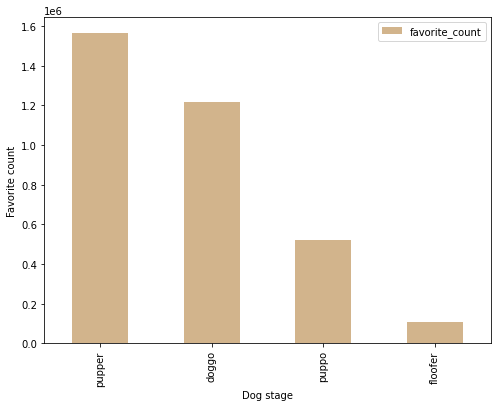

In [192]:
#Visualizing this on a bar chart 
fav.plot(kind='bar',ylabel='Favorite count',xlabel='Dog stage', figsize=(8,6), color ='tan');

#### Question 2: Which Dog stage is rated the highest?

In [177]:
rate = pd.DataFrame(Data.groupby('dog_type').mean()['rating_numerator'].sort_values(ascending=False).round(2))

In [193]:
rate

,rating_numerator
dog_type,
puppo,12.04
doggo,11.89
floofer,11.88
pupper,10.65


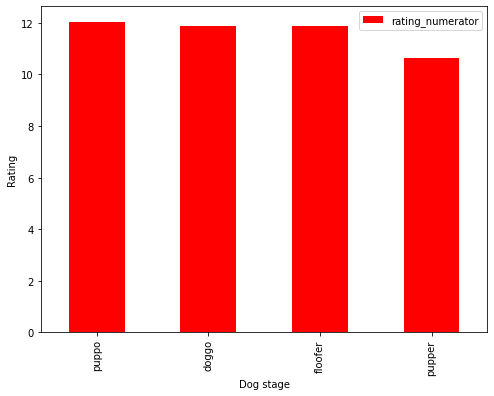

In [194]:
rate.plot(kind='bar',ylabel='Rating',xlabel='Dog stage', figsize=(8,6), color ='red');

Albeit not by a landslide, the puppo dog type edges the other dog types in terms of rating.

#### Question 3: Let's further validate that the most liked dog stage being pupper is affected by the count of tweets for the pupper dog stage

In [220]:
count = pd.DataFrame(Data['dog_type'].value_counts(normalize=True).sort_values(ascending=False).round(2)*100)

In [221]:
count

,dog_type
pupper,69.0
doggo,21.0
puppo,8.0
floofer,3.0


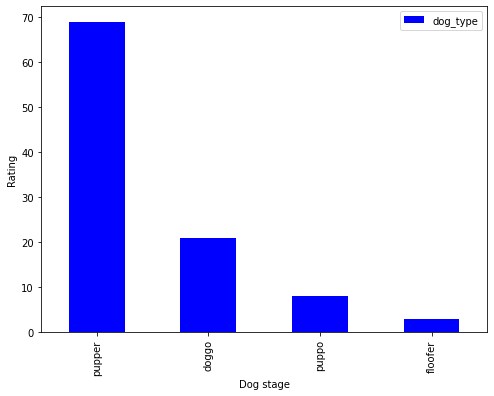

In [222]:
count.plot(kind='bar',ylabel='Rating',xlabel='Dog stage', figsize=(8,6), color ='blue');

This clearly shows that the dog stage that is clearly loved by the twitter community is the puppper stage, the stage ranked highest in average count of favorite,and also the amount of tweets.

#### What day of the week had the most tweet engagement?

In [241]:
day_count = pd.DataFrame(Data.groupby('day').sum()['favorite_count'].sort_values(ascending=False).round(2))

In [242]:
day_count

,favorite_count
day,
Saturday,684550.0
Wednesday,626139.0
Monday,544955.0
Thursday,426057.0
Tuesday,415965.0
Sunday,401311.0
Friday,319355.0


In [243]:
day_count_rt = pd.DataFrame(Data.groupby('day').sum()['retweet_count'].sort_values(ascending=False).round(2))

In [244]:
day_count_rt

,retweet_count
day,
Saturday,290745.0
Wednesday,211878.0
Monday,169316.0
Thursday,144112.0
Tuesday,121225.0
Sunday,118571.0
Friday,107582.0


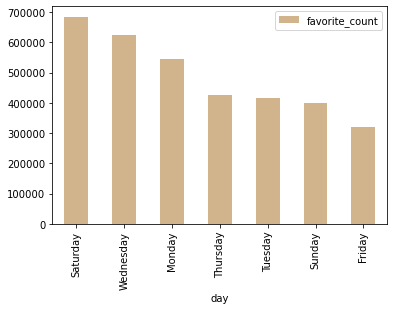

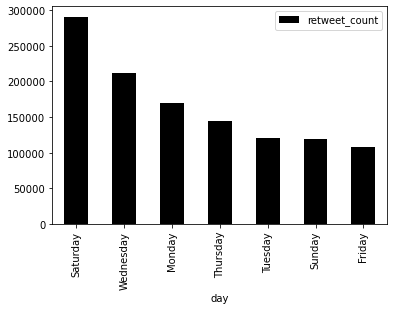

In [255]:
day_count.plot(kind = 'bar', label = 'favorite',color ='tan');
day_count_rt.plot(kind = 'bar',label = 'retweet',color='black');
plt.show()

## Conclusion

- The most liked dog stage is the pupper stage
- Tweets should be made on saturdays as the day records more engagements in terms of retweets and favorites